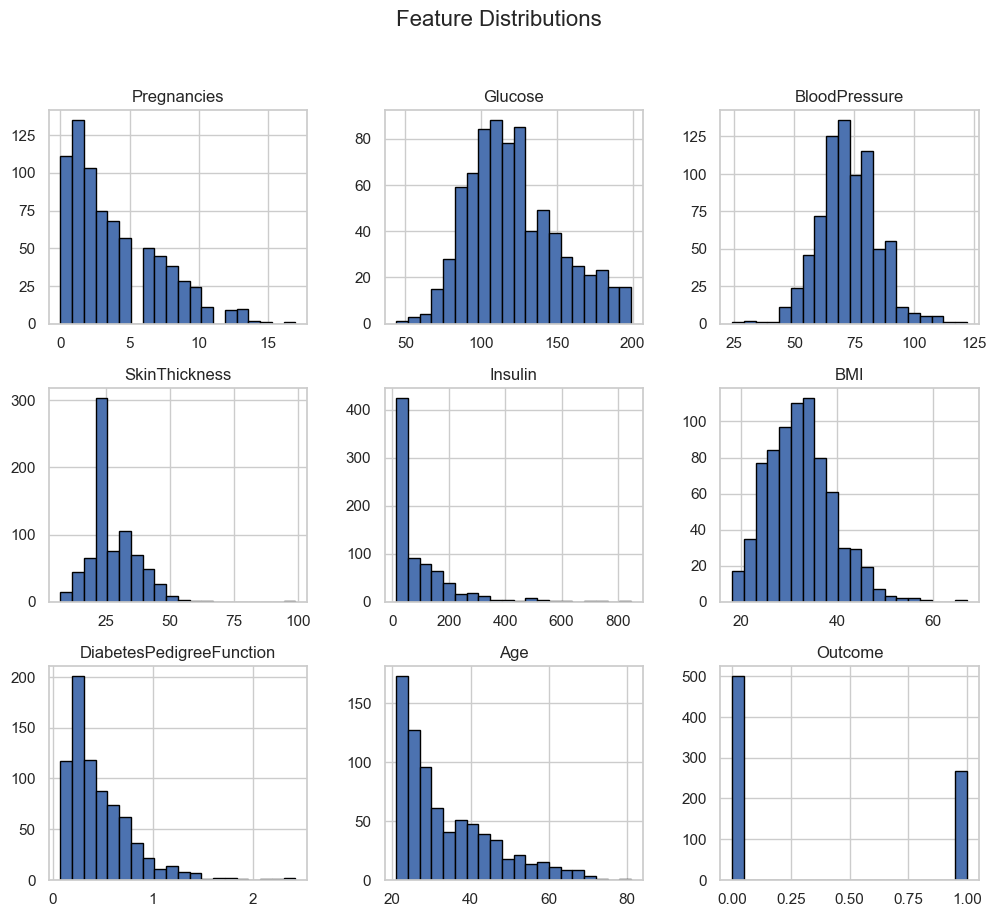

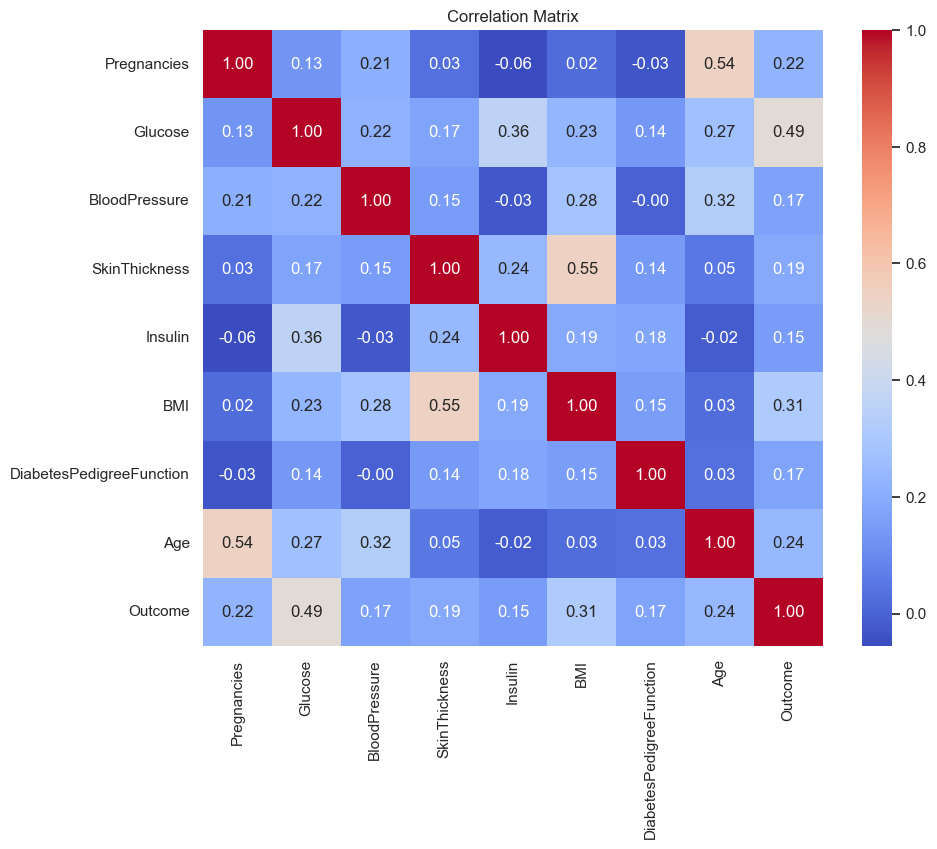

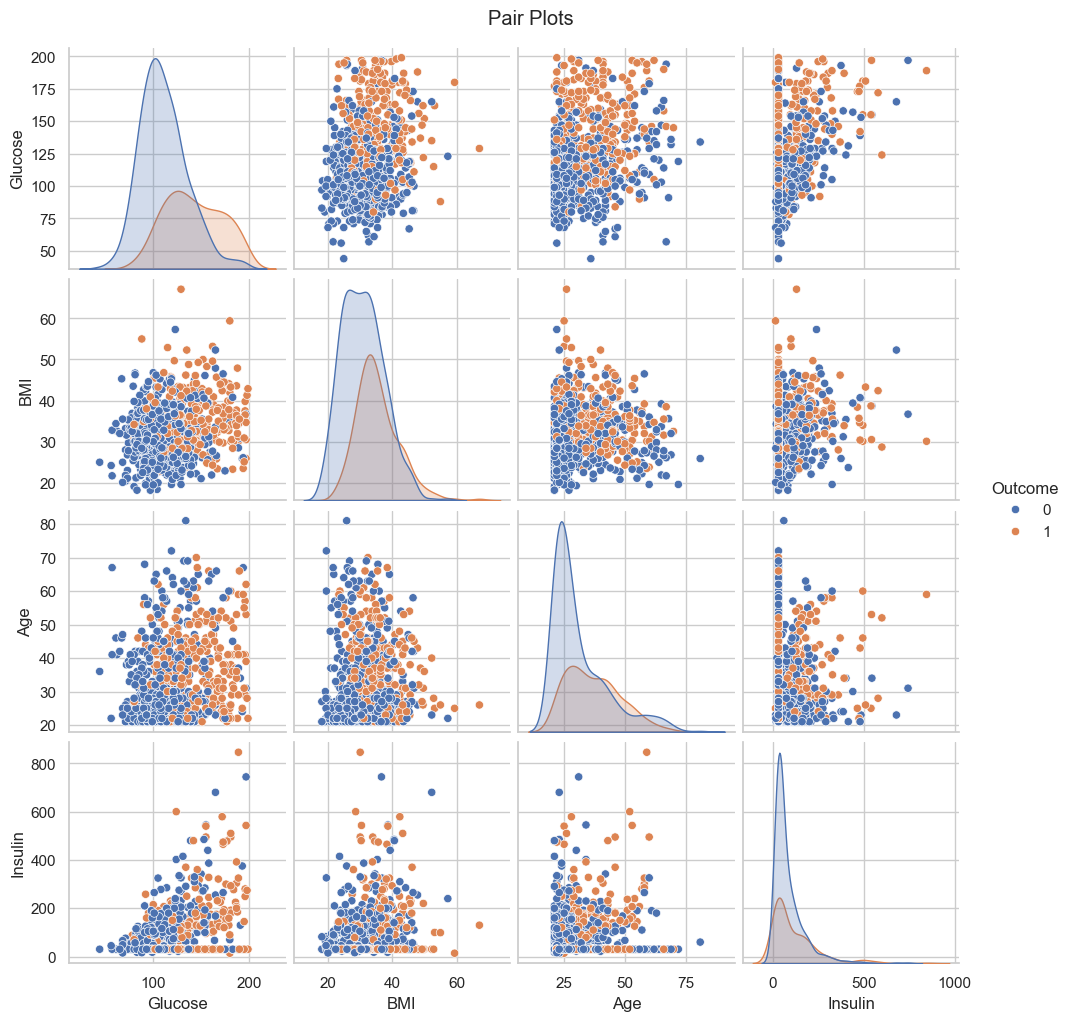

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Loading the dataset
file_path =  r"C:\Users\M.P.VAISHNAV\Videos\diabetes.csv" # Replace with your file path
data = pd.read_csv(file_path)

# Imputing zero values with the median of each column
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_to_impute:
    median_value = data[column].median()
    data[column] = data[column].replace(0, median_value)

# Normalizing the dataset (excluding the target variable 'Outcome')
scaler = StandardScaler()
data_normalized = data.copy()
data_normalized[columns_to_impute + ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(data_normalized[columns_to_impute + ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']])

# Setting the style of the visualization
sns.set(style="whitegrid")

# Ploting histograms for each feature
data.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Ploting the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Pairing plot for selected features
sns.pairplot(data, vars=['Glucose', 'BMI', 'Age', 'Insulin'], hue='Outcome')
plt.suptitle('Pair Plots', y=1.02)
plt.show()
